# Proyecto Machine Learning  - The Bridge - Joaquín Villar 🚀

# Análisis de Préstamos - Declaración del Problema 📊

## Introducción 📑
Las instituciones financieras especializadas en préstamos deben evaluar la solvencia de los solicitantes para minimizar el riesgo de impago. En este notebook, vamos a estudiar los perfiles de clientes que han recibido un préstamo y analizar su comportamiento de pago. Este análisis nos permitirá identificar patrones que ayuden a predecir si futuros solicitantes de préstamos cumplirán con sus pagos o no.

El objetivo es aplicar Análisis Exploratorio de Datos (EDA) y Machine Learning para predecir el riesgo de impago en base a las características de los clientes. Con esta información, se podrán tomar decisiones más informadas sobre a quién otorgar un préstamo y a quién rechazar, minimizando las pérdidas financieras.

## Entendimiento del Negocio 📝
Trabajas en una empresa de préstamos que debe decidir si aprueba o rechaza una solicitud basándose en el perfil del solicitante. Las decisiones conllevan dos riesgos principales:

- **Pérdida de negocio**: Si se rechaza una solicitud de préstamo a un solicitante que tiene capacidad de pago, la empresa pierde una oportunidad de generar ingresos.
- **Pérdida financiera**: Si se aprueba un préstamo a un solicitante que no puede pagar, la empresa sufrirá una pérdida económica.

El conjunto de datos incluye información sobre clientes que han solicitado y recibido un préstamo, junto con el estado de sus pagos. El objetivo es identificar perfiles de clientes que han pagado correctamente sus préstamos (buenos pagadores) y aquellos que no lo han hecho (morosos). Esta información nos permitirá predecir el comportamiento de futuros solicitantes y tomar decisiones basadas en su perfil:

- Rechazar la solicitud de préstamo.
- Ajustar el monto del préstamo.
- Ofrecer el préstamo con una tasa de interés más alta a solicitantes de alto riesgo.

## Distribución del target en el dataset 💰
1. **Préstamo aprobado**: Cuando se aprueba una solicitud, se pueden presentar tres escenarios:
   - **Totalmente pagado**: El solicitante ha cumplido con el pago total (capital e intereses).
   - **En proceso de pago**: El solicitante sigue pagando, pero aún no ha completado el préstamo. Estos clientes no son considerados incumplidores.
   - **Incumplimiento (Charged-off)**: El solicitante no ha pagado según lo acordado durante un período prolongado, lo que indica un incumplimiento.

2. **Préstamo rechazado**: Si se rechaza una solicitud, no hay historial de transacciones disponible para esos solicitantes en el conjunto de datos.

## Objetivos del Negocio 🎯
El objetivo de este análisis es reducir las pérdidas crediticias identificando a los clientes de alto riesgo, es decir, aquellos con una alta probabilidad de incumplir el pago de su préstamo. Los clientes etiquetados como "charged-off" son los incumplidores que generan la mayor parte de estas pérdidas.

A través de este análisis, buscamos identificar los factores que predicen si un solicitante tiene altas probabilidades de no pagar su préstamo. Este conocimiento se utilizará para tomar decisiones más informadas sobre la concesión de préstamos, como aprobar o rechazar solicitudes, ajustar montos, o modificar tasas de interés. Así, podremos gestionar mejor el riesgo y reducir las pérdidas crediticias en el futuro.

--------------

# 1. Carga de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import bootcampviztools as bt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("../data_sample/lending_club_loan_two.csv")

In [3]:
df = data.copy()

In [4]:
df.head(5)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Descripción de las Columnas del Dataset
| #  | Columna                  | Descripción                                                                                                                                 | Tipo        |
|----|--------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| 0  | `loan_amnt`              | El monto del préstamo solicitado por el cliente. Si el monto del préstamo es reducido por el departamento de crédito, se reflejará aquí.   | numérico    |
| 1  | `term`                   | El número de pagos del préstamo. Los valores son en meses y pueden ser 36 o 60.                                                               | numérico    |
| 2  | `int_rate`               | Tasa de interés del préstamo.                                                                                                                 | numérico    |
| 3  | `installment`            | El pago mensual que debe realizar el cliente si el préstamo se origina.                                                                  | numérico    |
| 4  | `grade`                  | Grado asignado al préstamo por la entidad.                                                                                                           | texto       |
| 5  | `sub_grade`              | Subgrado asignado al préstamo por la entidad.                                                                                                        | texto       |
| 6  | `emp_title`              | El título del trabajo proporcionado por el cliente al solicitar el préstamo.                                                             | texto       |
| 7  | `emp_length`             | La duración del empleo en años. Los valores posibles van de 0 a 10, donde 0 significa menos de un año y 10 significa diez o más años.         | numérico    |
| 8  | `home_ownership`         | El estado de propiedad de la vivienda proporcionado por el cliente.                      | texto       |
| 9  | `annual_inc`             | El ingreso anual proporcionado por el cliente.                                                              | numérico    |
| 10 | `verification_status`    | Indica si el ingreso fue verificado por la entidad, no verificado, o si la fuente de ingreso fue verificada.                                          | texto       |
| 11 | `issue_d`                | El mes en el que se financió el préstamo.                                                                                                     | fecha       |
| 12 | `loan_status`            | El estado actual del préstamo. (0: Charged Off, 1: Fully Paid)                                                                                                                | texto       |
| 13 | `purpose`                | Una categoría proporcionada por el cliente para la solicitud del préstamo.                                                                | texto       |
| 14 | `title`                  | El título del préstamo proporcionado por el cliente.                                                                                     | texto       |
| 15 | `zip_code`               | Los primeros 3 números del código postal proporcionado por el cliente en la solicitud del préstamo.                                       | texto       |
| 16 | `addr_state`             | El estado proporcionado por el cliente en la solicitud del préstamo.                                                                     | texto       |
| 17 | `dti`                    | Una proporción calculada usando los pagos mensuales totales de deuda sobre las obligaciones totales de deuda, excluyendo el préstamo.       | numérico    |
| 18 | `earliest_cr_line`       | El mes en que se abrió la línea de crédito más antigua reportada del cliente.                                                              | fecha       |
| 19 | `open_acc`               | El número de líneas de crédito abiertas por el cliente.                                                             | numérico    |
| 20 | `pub_rec`                | Número de registros públicos negativos.                                                                                                       | numérico    |
| 21 | `revol_bal`              | El saldo total del crédito resuelto.                                                                                                         | numérico    |
| 22 | `revol_util`             | La tasa de utilización de la línea del crédito resuelto, es decir, la cantidad de crédito que el cliente está utilizando en relación con el crédito disponible. | numérico    |
| 23 | `total_acc`              | El número total de líneas de crédito actualmente en el archivo de créditos del cliente.                                                    | numérico    |
| 24 | `initial_list_status`    | El estado inicial de listado del préstamo. Los valores posibles son: W, F.                                                                    | texto       |
| 25 | `application_type`       | Indica si el préstamo es una solicitud individual o una solicitud conjunta con dos co-prestatarios.                                           | texto       |
| 26 | `mort_acc`               | Número de cuentas hipotecarias.                                                                                                               | numérico    |
| 27 | `pub_rec_bankruptcies`   | Número de quiebras en registros públicos.                                                                                                     | numérico    |
| 28 | `address`                | Dirección proporcionada por el cliente en la solicitud del préstamo.                                                                     | texto       |


# 2. Problema de Machine Learning: Clasificación
Buscamos predecir el estado del préstamo, que corresponde a la columna "loan_status" (0: préstamo incobrable , 1: préstamo pagado o en proceso de pago). Se trata de un problema de **Clasificación Binaria**.

# 3. Análisis de la Distribución del Target

In [6]:
target = "loan_status"

In [7]:
df[target].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

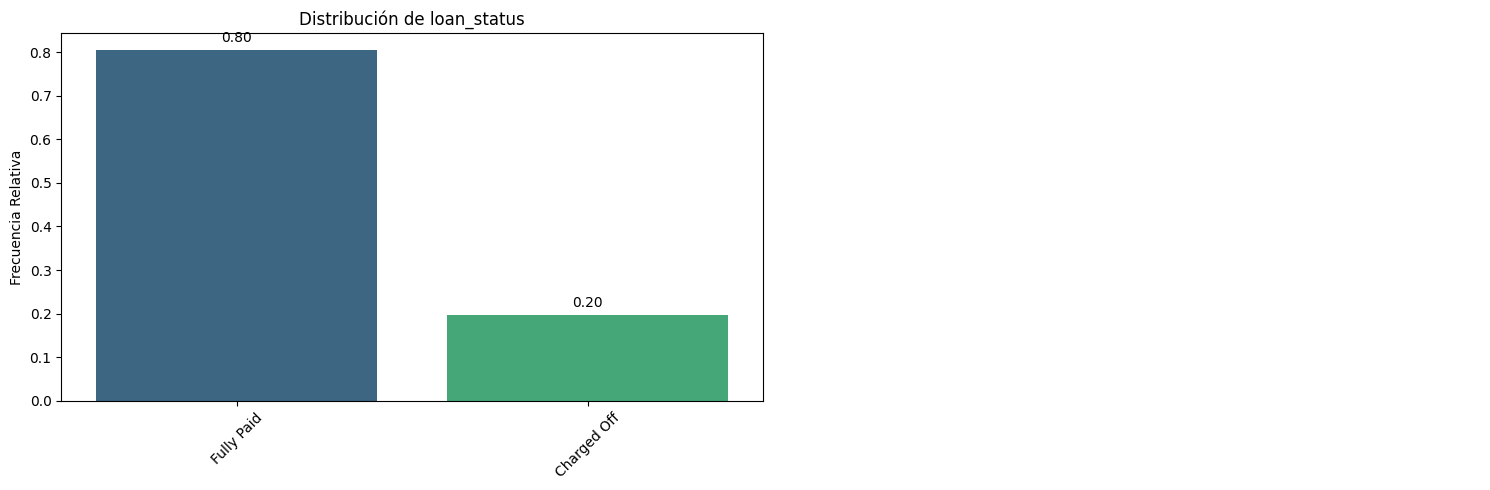

In [8]:
bt.pinta_distribucion_categoricas(df, [target], relativa=True, mostrar_valores= True)

Target desbalanceado, aplicaremos técnica oversampling sobre la clase minoritaria.

# 4. Comprensión de Variables

In [9]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T
        
data_report(df).T

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
loan_amnt,float64,0.0,1397,0.35
term,object,0.0,2,0.0
int_rate,float64,0.0,566,0.14
installment,float64,0.0,55706,14.07
grade,object,0.0,7,0.0
sub_grade,object,0.0,35,0.01
emp_title,object,5.79,173105,43.71
emp_length,object,4.62,11,0.0
home_ownership,object,0.0,6,0.0


In [10]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## 4.1. Limpieza y transformación - ETL

In [11]:
emp_length_dic = {
    "10+ years": 10,
    "< 1 year": 0,
    "1 year": 1,
    "2 years": 2,
    "3 years": 3,
    "4 years": 4,
    "5 years": 5,
    "6 years": 6,
    "7 years": 7,
    "8 years": 8,
    "9 years": 9
}

df["emp_length"] = df["emp_length"].map(emp_length_dic)

In [12]:
df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%Y")

In [13]:
# Convertir columna objetivo en binaria
loan_status_binario = {'Fully Paid': 1, 'Charged Off': 0} 
df[target] = df[target].map(loan_status_binario).astype(int, errors='ignore')

In [14]:
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format="%b-%Y")

# 5. Feature Red. Preliminar

## 5.1. Features Repetidas

In [15]:
df = df.drop(columns=["issue_d"])
df = df.drop(columns=["title"])
df = df.drop(columns=["earliest_cr_line"])

## 5.2. Identificadores/Columnas Únicas

In [16]:
df = df.drop(columns=["address"])

## 5.3. Feature selection
### 5.3.1. Correlación Lineal

In [17]:
numeric_cols = df.select_dtypes(include=["int32" , "int64" , "float64"]).columns
numeric_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [18]:
corr = np.abs(df[numeric_cols].corr()[target]).sort_values(ascending=False)
corr

loan_status             1.000000
int_rate                0.247758
revol_util              0.082373
mort_acc                0.073111
dti                     0.062413
loan_amnt               0.059836
annual_inc              0.053432
installment             0.041082
open_acc                0.028012
pub_rec                 0.019933
total_acc               0.017893
emp_length              0.013734
revol_bal               0.010892
pub_rec_bankruptcies    0.009383
Name: loan_status, dtype: float64

In [19]:
good_corr_feat = corr[corr > 0.05].index.values # Guardar columnas con correlación > 0.05

In [20]:
good_corr_feat

array(['loan_status', 'int_rate', 'revol_util', 'mort_acc', 'dti',
       'loan_amnt', 'annual_inc'], dtype=object)

In [21]:
bad_corr_feat = corr[corr < 0.05].index.values # Eliminar variables con correlación < 0.05
df.drop(columns=bad_corr_feat, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  object 
 2   int_rate             396030 non-null  float64
 3   grade                396030 non-null  object 
 4   sub_grade            396030 non-null  object 
 5   emp_title            373103 non-null  object 
 6   home_ownership       396030 non-null  object 
 7   annual_inc           396030 non-null  float64
 8   verification_status  396030 non-null  object 
 9   loan_status          396030 non-null  int32  
 10  purpose              396030 non-null  object 
 11  dti                  396030 non-null  float64
 12  revol_util           395754 non-null  float64
 13  initial_list_status  396030 non-null  object 
 14  application_type     396030 non-null  object 
 15  mort_acc         

# 6. Análisis Univariante

## 6.1. Variables Categóricas

In [23]:
df[target] = df[target].astype(object, errors='ignore')

In [24]:
cat_col = df.select_dtypes(include=["object"]).columns
cat_col

Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'initial_list_status',
       'application_type'],
      dtype='object')

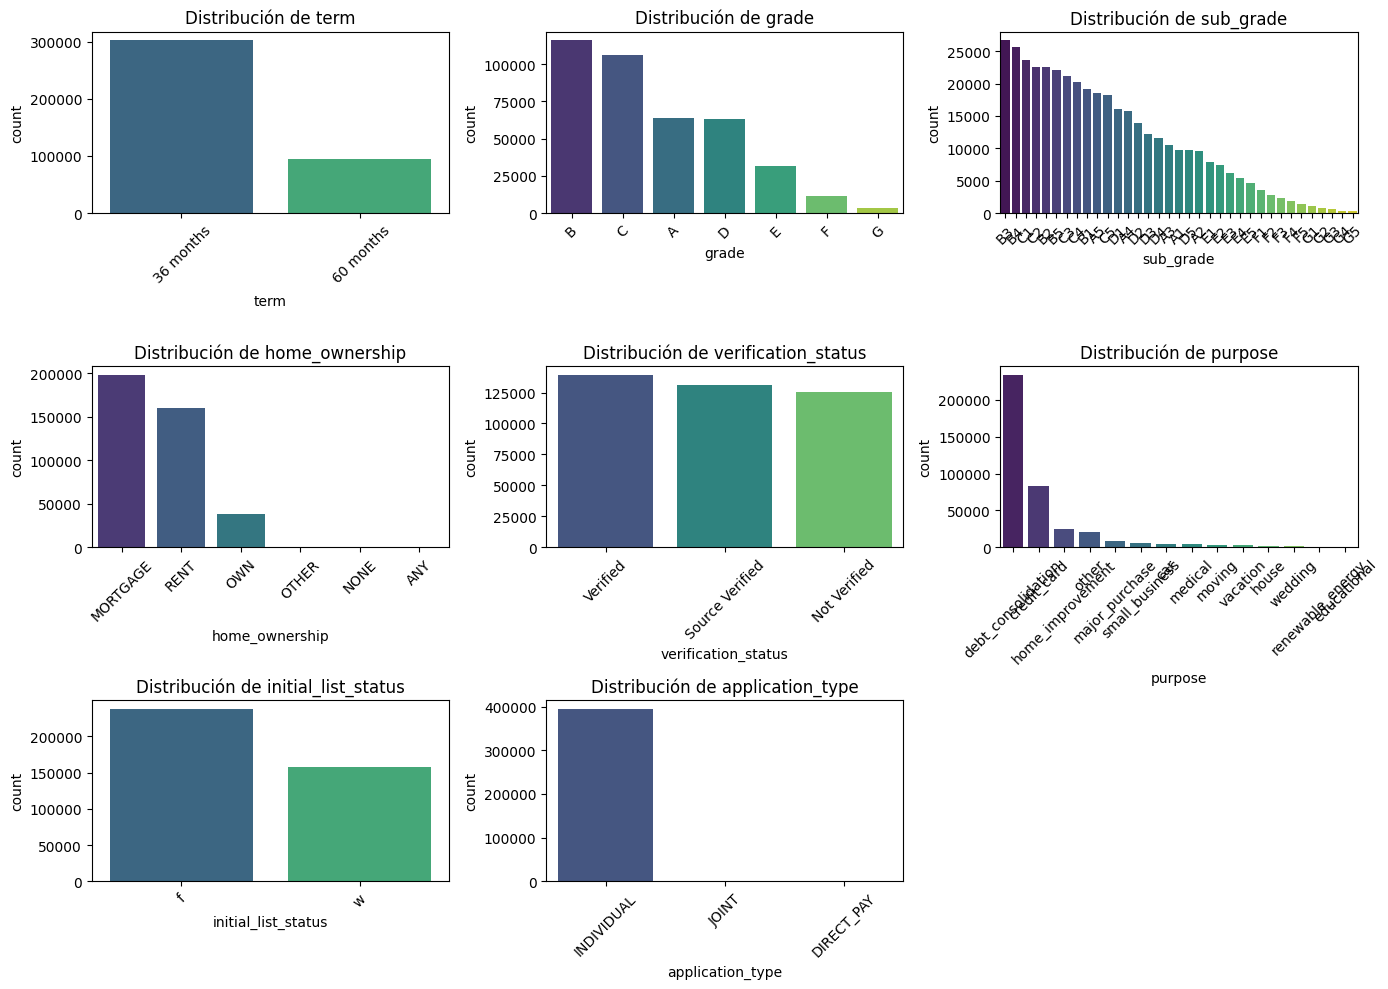

In [25]:
cat_col = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
            'purpose', 'initial_list_status', 'application_type']

plt.figure(figsize=(14, 10))
for i, var in enumerate(cat_col):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=var, order=df[var].value_counts().index, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribución de {var}")
plt.tight_layout()
plt.show()

## 6.2. Variables Numéricas

In [26]:
features_num = [col for col in good_corr_feat if target not in col]
features_num

['int_rate', 'revol_util', 'mort_acc', 'dti', 'loan_amnt', 'annual_inc']

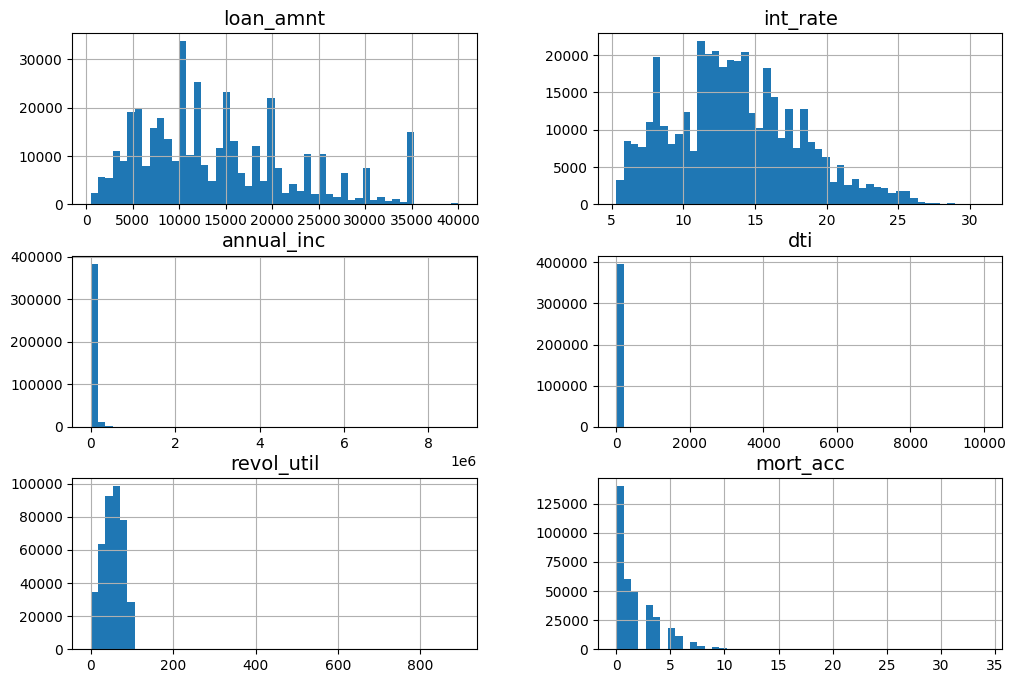

In [27]:
# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

array([[<Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'mort_acc'}>,
        <Axes: title={'center': 'dti'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'annual_inc'}>]], dtype=object)

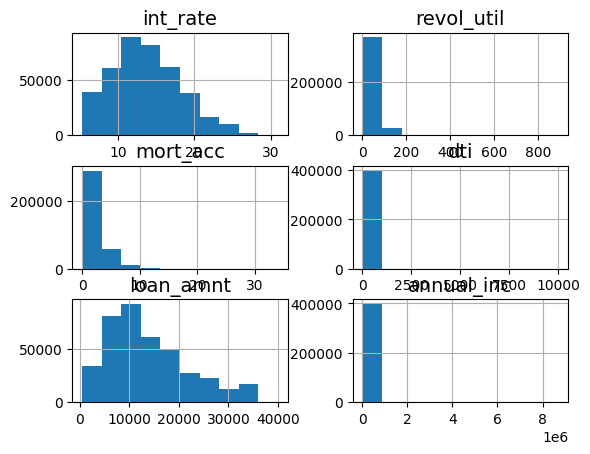

In [28]:
df[features_num].hist()

In [29]:
df[features_num].describe()

,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc
count,396030.000000,395754.000000,358235.000000,396030.000000,396030.000000,3.960300e+05
mean,13.639400,53.791749,1.813991,17.379514,14113.888089,7.420318e+04
std,4.472157,24.452193,2.147930,18.019092,8357.441341,6.163762e+04
min,5.320000,0.000000,0.000000,0.000000,500.000000,0.000000e+00
25%,10.490000,35.800000,0.000000,11.280000,8000.000000,4.500000e+04
50%,13.330000,54.800000,1.000000,16.910000,12000.000000,6.400000e+04
75%,16.490000,72.900000,3.000000,22.980000,20000.000000,9.000000e+04
max,30.990000,892.300000,34.000000,9999.000000,40000.000000,8.706582e+06


# 7. Análisis Bivariante

## 7.1. Correlation matrix/heatmap con Target

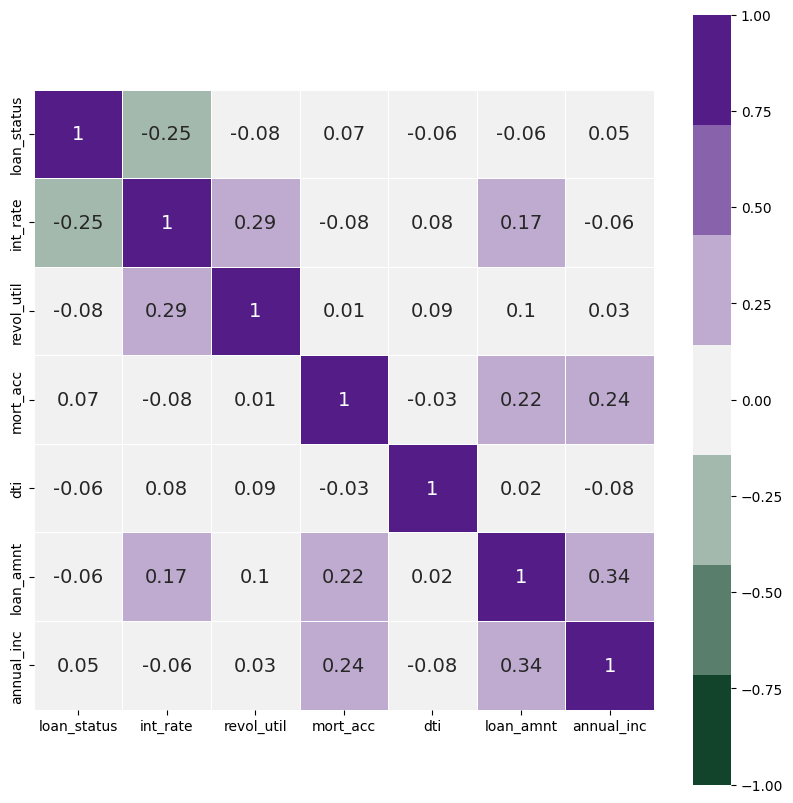

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df[good_corr_feat].corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

## 7.2. Correlation matrix/heatmap sin Target

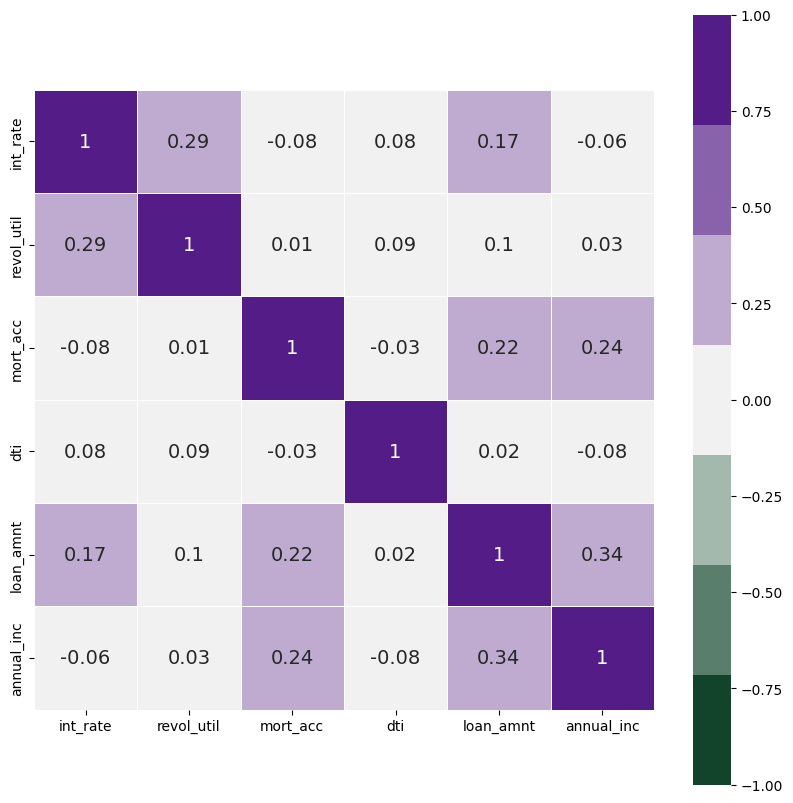

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df[features_num].corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

# 8. Eliminación de features

In [32]:
features_num

['int_rate', 'revol_util', 'mort_acc', 'dti', 'loan_amnt', 'annual_inc']

In [33]:
features_cat = ["term", "grade", "home_ownership",
       "verification_status", "purpose",
       "initial_list_status", "application_type"]
features_cat

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type']

In [34]:
data_report(df[features_num + features_cat])

COL_N,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc,term,grade,home_ownership,verification_status,purpose,initial_list_status,application_type
DATA_TYPE,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object
MISSINGS (%),0.0,0.07,9.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,566,1226,33,4262,1397,27197,2,7,6,3,14,2,3
CARDIN (%),0.14,0.31,0.01,1.08,0.35,6.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 9. Duplicados

In [35]:
df_features = df[features_num + features_cat].copy()

In [36]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,revol_util,initial_list_status,application_type,mort_acc
0,10000.0,36 months,11.44,B,B4,Marketing,RENT,117000.0,Not Verified,1,vacation,26.24,41.8,w,INDIVIDUAL,0.0
1,8000.0,36 months,11.99,B,B5,Credit analyst,MORTGAGE,65000.0,Not Verified,1,debt_consolidation,22.05,53.3,f,INDIVIDUAL,3.0
2,15600.0,36 months,10.49,B,B3,Statistician,RENT,43057.0,Source Verified,1,credit_card,12.79,92.2,f,INDIVIDUAL,0.0
3,7200.0,36 months,6.49,A,A2,Client Advocate,RENT,54000.0,Not Verified,1,credit_card,2.60,21.5,f,INDIVIDUAL,0.0
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,MORTGAGE,55000.0,Verified,0,credit_card,33.95,69.8,f,INDIVIDUAL,1.0


In [37]:
df_features[target] = df[target].astype(int).copy()

In [38]:
df = df_features.copy()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   int_rate             396030 non-null  float64
 1   revol_util           395754 non-null  float64
 2   mort_acc             358235 non-null  float64
 3   dti                  396030 non-null  float64
 4   loan_amnt            396030 non-null  float64
 5   annual_inc           396030 non-null  float64
 6   term                 396030 non-null  object 
 7   grade                396030 non-null  object 
 8   home_ownership       396030 non-null  object 
 9   verification_status  396030 non-null  object 
 10  purpose              396030 non-null  object 
 11  initial_list_status  396030 non-null  object 
 12  application_type     396030 non-null  object 
 13  loan_status          396030 non-null  int32  
dtypes: float64(6), int32(1), object(7)
memory usage: 40.8+ MB


In [40]:
data_report(df)

COL_N,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc,term,grade,home_ownership,verification_status,purpose,initial_list_status,application_type,loan_status
DATA_TYPE,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,int32
MISSINGS (%),0.0,0.07,9.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,566,1226,33,4262,1397,27197,2,7,6,3,14,2,3,2
CARDIN (%),0.14,0.31,0.01,1.08,0.35,6.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
duplicate_rows = df.duplicated(keep="first")
len(df[duplicate_rows])

0

In [42]:
df = df.drop_duplicates()

In [43]:
len(df.duplicated(keep="first"))

396030

# 10. Missing

In [44]:
# Imputar la mediana
df["revol_util"] = df["revol_util"].fillna(df["revol_util"].median())
df["mort_acc"] = df["mort_acc"].fillna(df["mort_acc"].median())

In [45]:
data_report(df)

COL_N,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc,term,grade,home_ownership,verification_status,purpose,initial_list_status,application_type,loan_status
DATA_TYPE,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,int32
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,566,1226,33,4262,1397,27197,2,7,6,3,14,2,3,2
CARDIN (%),0.14,0.31,0.01,1.08,0.35,6.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 11. Outliers

In [46]:
df.describe()

,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc,loan_status
count,396030.000000,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000
mean,13.639400,53.792451,1.736308,17.379514,14113.888089,7.420318e+04,0.803871
std,4.472157,24.443685,2.056819,18.019092,8357.441341,6.163762e+04,0.397068
min,5.320000,0.000000,0.000000,0.000000,500.000000,0.000000e+00,0.000000
25%,10.490000,35.900000,0.000000,11.280000,8000.000000,4.500000e+04,1.000000
50%,13.330000,54.800000,1.000000,16.910000,12000.000000,6.400000e+04,1.000000
75%,16.490000,72.900000,3.000000,22.980000,20000.000000,9.000000e+04,1.000000
max,30.990000,892.300000,34.000000,9999.000000,40000.000000,8.706582e+06,1.000000


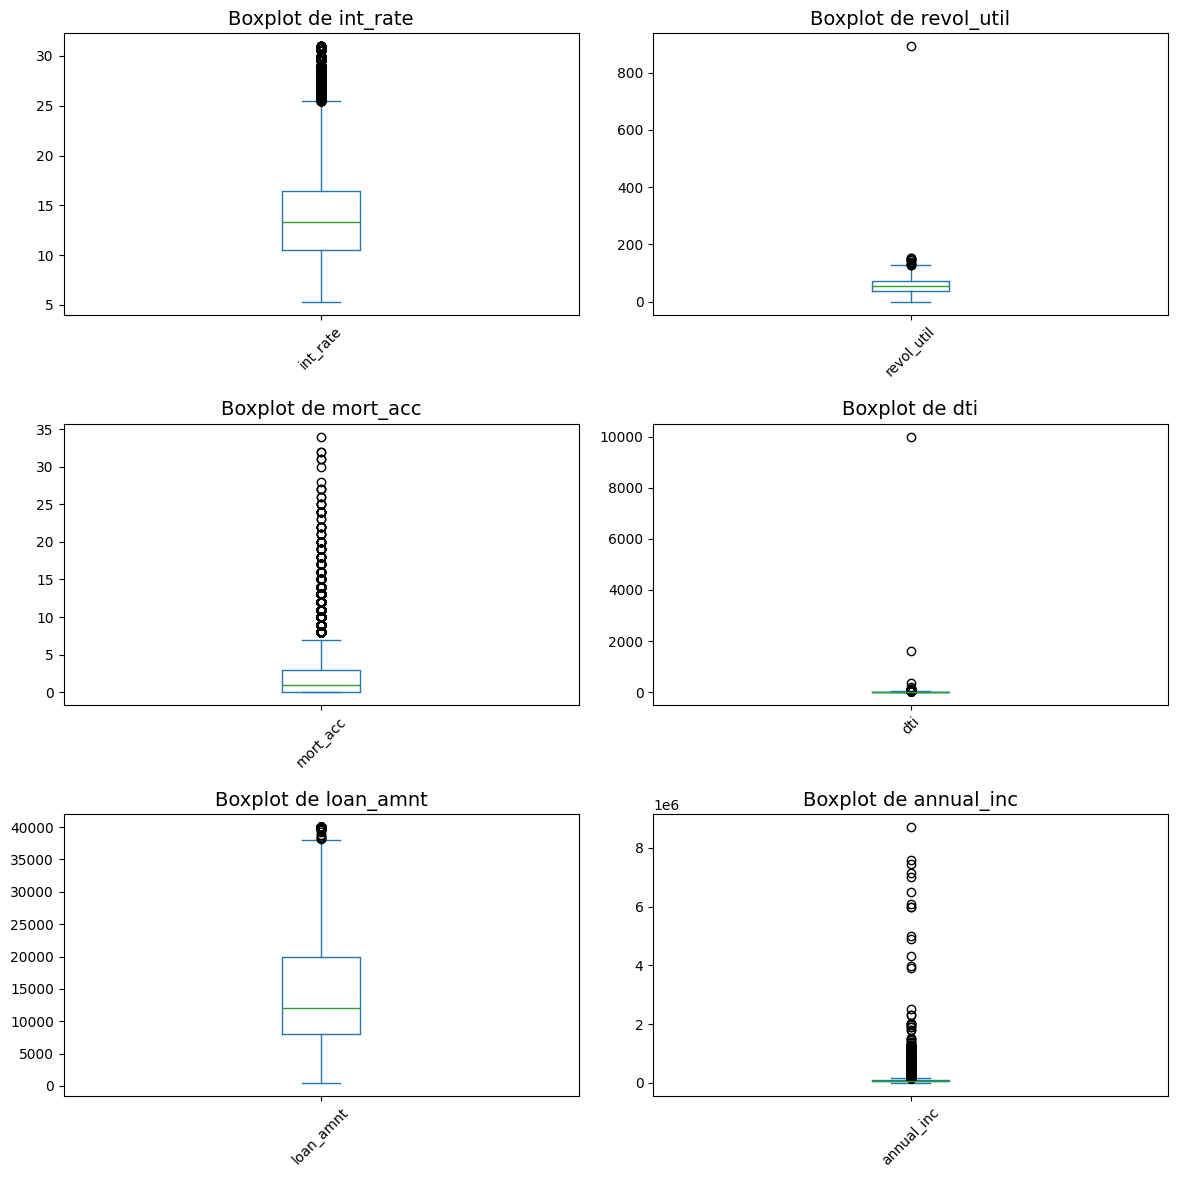

In [47]:
plt.figure(figsize=(12, 12))

for i, feature in enumerate(features_num, 1):
    plt.subplot(3, 2, i)  
    df[feature].plot.box()
    plt.title(f'Boxplot de {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [48]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3) para las columnas seleccionadas
Q1 = df[['int_rate', 'revol_util', 'mort_acc', 'dti', 'loan_amnt', 'annual_inc']].quantile(0.25)
Q3 = df[['int_rate', 'revol_util', 'mort_acc', 'dti', 'loan_amnt', 'annual_inc']].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular los límites inferiores y superiores para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detectar los outliers, es decir, aquellos que están fuera de los límites
outliers = ((df[['int_rate', 'revol_util', 'mort_acc', 'dti', 'loan_amnt', 'annual_inc']] < lower_bound) | 
            (df[['int_rate', 'revol_util', 'mort_acc', 'dti', 'loan_amnt', 'annual_inc']] > upper_bound))

# Mostrar el número de outliers en cada columna
print(outliers.sum())

int_rate       3777
revol_util       12
mort_acc       6843
dti             275
loan_amnt       191
annual_inc    16700
dtype: int64


In [49]:
# Eliminar las filas con outliers en cualquiera de las columnas seleccionadas
df_sin_outliers = df[~((df[['int_rate', 'revol_util', 'mort_acc', 'dti', 'loan_amnt', 'annual_inc']] < lower_bound) | 
                        (df[['int_rate', 'revol_util', 'mort_acc', 'dti', 'loan_amnt', 'annual_inc']] > upper_bound)).any(axis=1)]

# Mostrar el tamaño del DataFrame antes y después de eliminar outliers
print(f"Tamaño original: {df.shape}")
print(f"Tamaño sin outliers: {df_sin_outliers.shape}")

Tamaño original: (396030, 14)
Tamaño sin outliers: (369697, 14)


In [50]:
# Reseteo índices e igualo con las entradas para que no haya columnas vacías
df_sin_outliers = df_sin_outliers.reset_index(drop=True)

In [51]:
df_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369697 entries, 0 to 369696
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   int_rate             369697 non-null  float64
 1   revol_util           369697 non-null  float64
 2   mort_acc             369697 non-null  float64
 3   dti                  369697 non-null  float64
 4   loan_amnt            369697 non-null  float64
 5   annual_inc           369697 non-null  float64
 6   term                 369697 non-null  object 
 7   grade                369697 non-null  object 
 8   home_ownership       369697 non-null  object 
 9   verification_status  369697 non-null  object 
 10  purpose              369697 non-null  object 
 11  initial_list_status  369697 non-null  object 
 12  application_type     369697 non-null  object 
 13  loan_status          369697 non-null  int32  
dtypes: float64(6), int32(1), object(7)
memory usage: 38.1+ MB


In [52]:
df = df_sin_outliers.copy()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369697 entries, 0 to 369696
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   int_rate             369697 non-null  float64
 1   revol_util           369697 non-null  float64
 2   mort_acc             369697 non-null  float64
 3   dti                  369697 non-null  float64
 4   loan_amnt            369697 non-null  float64
 5   annual_inc           369697 non-null  float64
 6   term                 369697 non-null  object 
 7   grade                369697 non-null  object 
 8   home_ownership       369697 non-null  object 
 9   verification_status  369697 non-null  object 
 10  purpose              369697 non-null  object 
 11  initial_list_status  369697 non-null  object 
 12  application_type     369697 non-null  object 
 13  loan_status          369697 non-null  int32  
dtypes: float64(6), int32(1), object(7)
memory usage: 38.1+ MB


In [54]:
data_report(df)

COL_N,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc,term,grade,home_ownership,verification_status,purpose,initial_list_status,application_type,loan_status
DATA_TYPE,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,int32
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,522,1201,8,4015,1380,25347,2,7,6,3,14,2,3,2
CARDIN (%),0.14,0.32,0.0,1.09,0.37,6.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 12. Feature Engineering
## 12.1. Escalados

In [55]:
features_num

['int_rate', 'revol_util', 'mort_acc', 'dti', 'loan_amnt', 'annual_inc']

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369697 entries, 0 to 369696
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   int_rate             369697 non-null  float64
 1   revol_util           369697 non-null  float64
 2   mort_acc             369697 non-null  float64
 3   dti                  369697 non-null  float64
 4   loan_amnt            369697 non-null  float64
 5   annual_inc           369697 non-null  float64
 6   term                 369697 non-null  object 
 7   grade                369697 non-null  object 
 8   home_ownership       369697 non-null  object 
 9   verification_status  369697 non-null  object 
 10  purpose              369697 non-null  object 
 11  initial_list_status  369697 non-null  object 
 12  application_type     369697 non-null  object 
 13  loan_status          369697 non-null  int32  
dtypes: float64(6), int32(1), object(7)
memory usage: 38.1+ MB


In [57]:
data_report(df[features_num])

COL_N,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc
DATA_TYPE,float64,float64,float64,float64,float64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,522,1201,8,4015,1380,25347
CARDIN (%),0.14,0.32,0.0,1.09,0.37,6.86


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Escalamos en una copia
df_scaled = pd.DataFrame(scaler.fit_transform(df[features_num]), columns=features_num)

# Asignamos manteniendo los índices originales
df[features_num] = df_scaled.values  

# Verificamos si ahora hay NaN
print(df[features_num].isnull().sum())  # Esto debe dar 0


int_rate      0
revol_util    0
mort_acc      0
dti           0
loan_amnt     0
annual_inc    0
dtype: int64


In [59]:
df.describe()

,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc,loan_status
count,3.696970e+05,3.696970e+05,3.696970e+05,3.696970e+05,3.696970e+05,3.696970e+05,369697.000000
mean,1.991439e-16,-5.828151e-16,-2.158361e-17,1.531610e-16,7.332276e-17,-4.005364e-17,0.803177
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.397598
min,-1.916769e+00,-2.207731e+00,-8.857617e-01,-2.176556e+00,-1.635158e+00,-2.122911e+00,0.000000
25%,-7.123350e-01,-7.351937e-01,-8.857617e-01,-7.435183e-01,-7.615272e-01,-7.369510e-01,1.000000
50%,-5.071161e-02,4.220750e-02,-3.162710e-01,-4.931318e-02,-1.999075e-01,-1.977789e-01,1.000000
75%,6.388677e-01,7.784763e-01,8.227105e-01,6.969573e-01,5.957204e-01,6.152046e-01,1.000000
max,2.770507e+00,3.061321e+00,3.100673e+00,2.846514e+00,3.045006e+00,3.065987e+00,1.000000


In [60]:
data_report(df[features_num])

COL_N,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc
DATA_TYPE,float64,float64,float64,float64,float64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,522,1201,8,4015,1380,25347
CARDIN (%),0.14,0.32,0.0,1.09,0.37,6.86


## 12.2. Encondings

In [61]:
features_cat

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type']

In [62]:
data_report(df[features_cat])

COL_N,term,grade,home_ownership,verification_status,purpose,initial_list_status,application_type
DATA_TYPE,object,object,object,object,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,2,7,6,3,14,2,3
CARDIN (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
from sklearn.preprocessing import OrdinalEncoder


grade_ord = [["A", "B", "C", "D", "E", "F", "G"]]

encoder = OrdinalEncoder(categories=grade_ord)
df["grade"] = encoder.fit_transform(df[["grade"]])

In [64]:
features_cat = [feature for feature in features_cat if feature not in ["grade" , "title"]]
features_cat

['term',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type']

In [65]:
df = pd.get_dummies(df, columns=features_cat,dtype=int)
df.head(5)

,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc,grade,loan_status,term_ 36 months,term_ 60 months,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
0,-0.491017,-0.488400,-0.885762,1.076291,-0.449516,1.696929,1.0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,-0.362886,-0.015378,0.822711,0.556877,-0.699125,-0.060873,1.0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
2,-0.712335,1.584670,-0.885762,-0.591041,0.249388,-0.802632,1.0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
3,-1.644199,-1.323386,-0.885762,-1.854246,-0.798969,-0.432716,0.0,1,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0.867174,0.663306,-0.316271,2.032062,1.344547,-0.398912,2.0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


# 13. División en Train y Test

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369697 entries, 0 to 369696
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   int_rate                             369697 non-null  float64
 1   revol_util                           369697 non-null  float64
 2   mort_acc                             369697 non-null  float64
 3   dti                                  369697 non-null  float64
 4   loan_amnt                            369697 non-null  float64
 5   annual_inc                           369697 non-null  float64
 6   grade                                369697 non-null  float64
 7   loan_status                          369697 non-null  int32  
 8   term_ 36 months                      369697 non-null  int32  
 9   term_ 60 months                      369697 non-null  int32  
 10  home_ownership_ANY                   369697 non-null  int32  
 11  home_ownershi

In [67]:
data_report(df)

COL_N,int_rate,revol_util,mort_acc,dti,loan_amnt,annual_inc,grade,loan_status,term_ 36 months,term_ 60 months,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,...,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,522,1201,8,4015,1380,25347,7,2,2,2,...,2,2,2,2,2,2,2,2,2,2
CARDIN (%),0.14,0.32,0.0,1.09,0.37,6.86,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1) 
y = df['loan_status']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df[target] , random_state=42)

In [69]:
print(X_train.isnull().sum().sum())  # Contar valores NaN en X_train
print(X_test.isnull().sum().sum())   # Contar valores NaN en X_test

0
0


In [70]:
y_train.value_counts()

loan_status
1    237545
0     58212
Name: count, dtype: int64

In [71]:
y_test.value_counts()

loan_status
1    59387
0    14553
Name: count, dtype: int64

# 14. Métricas para clasificación - Matriz de confusión
Utilizaremos la matriz de confusión para medir nuestro modelo, con especial atención en el recall ya que lo que buscamos es minimizar los FN (Falsos Negativos).

Recall (Sensibilidad para "Charged Off"): Mide cuántos de los préstamos impagos (Charged Off = 0) fueron correctamente identificados.
Queremos un recall alto, ya que minimizar los falsos positivos significa menos clientes de alto riesgo aprobados por error. **recall = TP / (TP + FN)**

# 15. Decidir qué modelos
## 15.1. Modelos baseline (Logistic Regression, Random Forest, Xgboost) 

In [72]:
from sklearn.metrics import (classification_report, confusion_matrix, 
                             ConfusionMatrixDisplay, balanced_accuracy_score, accuracy_score, make_scorer)
import joblib
import os

# Ruta del proyecto
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))  
models_dir = os.path.join(project_root, 'src', 'models')  

In [73]:
def train_and_evaluate(model, name):
    # Entrenamos el modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=['Charged Off', 'Fully Paid'], yticklabels=['Charged Off', 'Fully Paid'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Guardar el modelo en la ruta correcta
    model_path = os.path.join(models_dir, f'{name}_model.joblib')
    joblib.dump(model, model_path)
    print(f"Model {name} saved as {model_path}")

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.51      0.07      0.12     14553
           1       0.81      0.98      0.89     59387

    accuracy                           0.80     73940
   macro avg       0.66      0.53      0.51     73940
weighted avg       0.75      0.80      0.74     73940



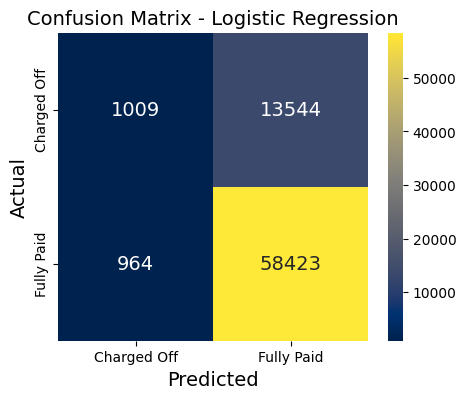

Model Logistic Regression saved as c:\Users\María Moya\Documents\GitHub\PROJECT_ML_JOAQUINVILLAR_ONLINE_DS_THEBRIDGE\src\models\Logistic Regression_model.joblib


In [75]:
# Modelo 1: Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
train_and_evaluate(log_reg, "Logistic Regression")


Model: Random Forest
              precision    recall  f1-score   support

           0       0.47      0.09      0.16     14553
           1       0.81      0.97      0.89     59387

    accuracy                           0.80     73940
   macro avg       0.64      0.53      0.52     73940
weighted avg       0.75      0.80      0.74     73940



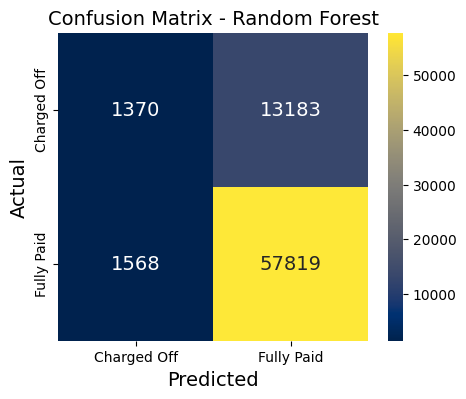

Model Random Forest saved as c:\Users\María Moya\Documents\GitHub\PROJECT_ML_JOAQUINVILLAR_ONLINE_DS_THEBRIDGE\src\models\Random Forest_model.joblib


In [76]:
# Modelo 2: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(rf, "Random Forest")


Model: XGBoost
              precision    recall  f1-score   support

           0       0.52      0.08      0.14     14553
           1       0.81      0.98      0.89     59387

    accuracy                           0.80     73940
   macro avg       0.67      0.53      0.52     73940
weighted avg       0.76      0.80      0.74     73940



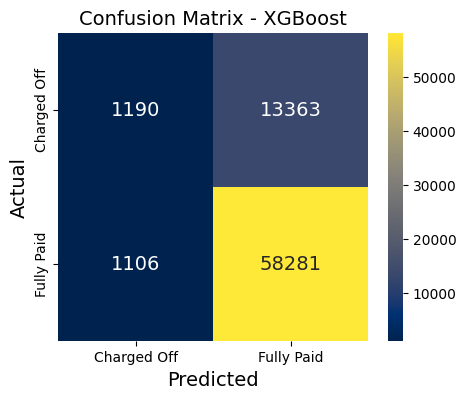

Model XGBoost saved as c:\Users\María Moya\Documents\GitHub\PROJECT_ML_JOAQUINVILLAR_ONLINE_DS_THEBRIDGE\src\models\XGBoost_model.joblib


In [77]:
# Modelo 3: XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
train_and_evaluate(xgb, "XGBoost")

## 15.2. Modelos (Logistic Regression, Random Forrest, Xgboost) con `UnderSampler`

In [78]:
# pip install imbalanced-learn

In [79]:
from imblearn.under_sampling import RandomUnderSampler


under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_UNDER, y_UNDER = under_sampler.fit_resample(X_train, y_train)

# Verificamos la nueva distribución de clases
print(pd.Series(y_UNDER).value_counts())

loan_status
0    58212
1    58212
Name: count, dtype: int64


In [80]:
y_UNDER.value_counts(True)

loan_status
0    0.5
1    0.5
Name: proportion, dtype: float64

In [81]:
y_train.value_counts()

loan_status
1    237545
0     58212
Name: count, dtype: int64

In [82]:
# Función para entrenar y evaluar modelos con UNDER
def train_and_evaluate_UNDER(model, name):
    model.fit(X_UNDER, y_UNDER)
    y_pred = model.predict(X_test)
    
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=['Charged Off', 'Fully Paid'], yticklabels=['Charged Off', 'Fully Paid'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Guardar el modelo en la ruta correcta
    model_path = os.path.join(models_dir, f'{name}_model.joblib')
    joblib.dump(model, model_path)
    print(f"Model {name} saved as {model_path}")


Model: Logistic Regression with UNDER
              precision    recall  f1-score   support

           0       0.32      0.64      0.42     14553
           1       0.88      0.66      0.76     59387

    accuracy                           0.66     73940
   macro avg       0.60      0.65      0.59     73940
weighted avg       0.77      0.66      0.69     73940



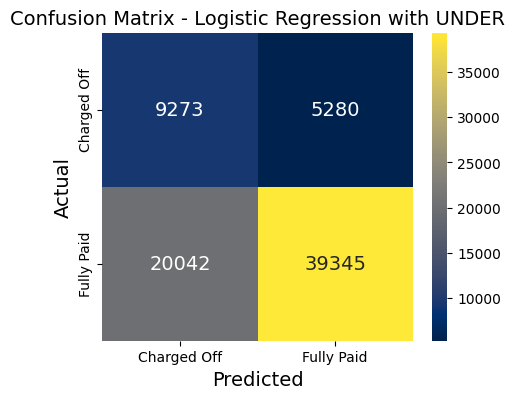

Model Logistic Regression with UNDER saved as c:\Users\María Moya\Documents\GitHub\PROJECT_ML_JOAQUINVILLAR_ONLINE_DS_THEBRIDGE\src\models\Logistic Regression with UNDER_model.joblib


In [83]:
# Modelo 4: Regresión Logística con UNDER
log_reg_UNDER = LogisticRegression(max_iter=1000)
train_and_evaluate_UNDER(log_reg_UNDER, "Logistic Regression with UNDER")


Model: Random Forest with UNDER
              precision    recall  f1-score   support

           0       0.30      0.66      0.41     14553
           1       0.88      0.62      0.73     59387

    accuracy                           0.63     73940
   macro avg       0.59      0.64      0.57     73940
weighted avg       0.77      0.63      0.67     73940



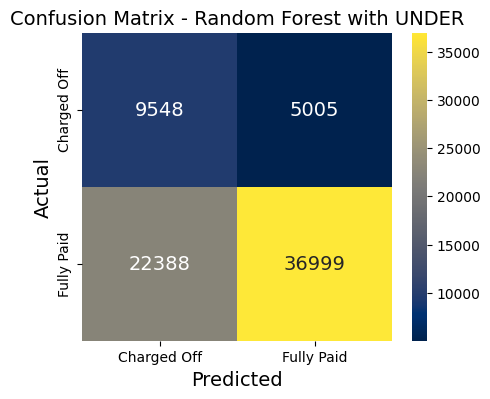

Model Random Forest with UNDER saved as c:\Users\María Moya\Documents\GitHub\PROJECT_ML_JOAQUINVILLAR_ONLINE_DS_THEBRIDGE\src\models\Random Forest with UNDER_model.joblib


In [84]:
# Modelo 5: Random Forest con UNDER
rf_UNDER = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_UNDER(rf_UNDER, "Random Forest with UNDER")


Model: XGBoost with UNDER
              precision    recall  f1-score   support

           0       0.31      0.66      0.43     14553
           1       0.89      0.65      0.75     59387

    accuracy                           0.65     73940
   macro avg       0.60      0.65      0.59     73940
weighted avg       0.77      0.65      0.69     73940



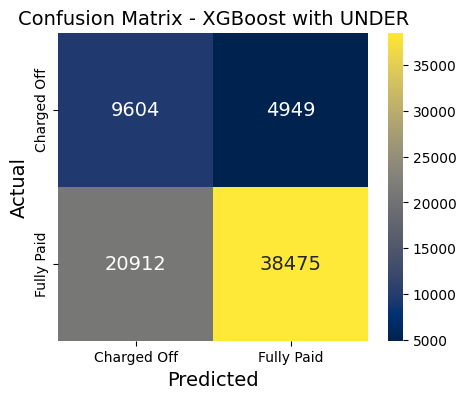

Model XGBoost with UNDER saved as c:\Users\María Moya\Documents\GitHub\PROJECT_ML_JOAQUINVILLAR_ONLINE_DS_THEBRIDGE\src\models\XGBoost with UNDER_model.joblib


In [85]:
# Modelo 6: XGBoost con UNDER
xgb_UNDER = XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True)
train_and_evaluate_UNDER(xgb_UNDER, "XGBoost with UNDER")

## 15.3. Evaluamos Modelos

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [87]:
# Resultados iniciales de los modelos base (creamos un diccionario para después poder hacer una tabla de comparación)
model_results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", 
              "Logistic Regression with UNDER", "Random Forest with UNDER", "XGBoost with UNDER"],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

In [88]:
# Evaluar los modelos base sin UNDER
for name, model in [("Logistic Regression", log_reg), ("Random Forest", rf), ("XGBoost", xgb)]:
    y_pred = model.predict(X_test)
    model_results["Precision"].append(precision_score(y_test, y_pred, pos_label=0))  
    model_results["Recall"].append(recall_score(y_test, y_pred, pos_label=0))        
    model_results["F1-Score"].append(f1_score(y_test, y_pred, pos_label=0)) 

In [89]:
# Evaluar los modelos con UNDER
for name, model in [("Logistic Regression with UNDER", log_reg_UNDER), 
                    ("Random Forest with UNDER", rf_UNDER), 
                    ("XGBoost with UNDER", xgb_UNDER)]:
    y_pred = model.predict(X_test)
    model_results["Precision"].append(precision_score(y_test, y_pred, pos_label=0))  # Cambiado a clase 0
    model_results["Recall"].append(recall_score(y_test, y_pred, pos_label=0))        # Cambiado a clase 0
    model_results["F1-Score"].append(f1_score(y_test, y_pred, pos_label=0))

In [90]:
resultados = pd.DataFrame(model_results)
resultados

,Model,Precision,Recall,F1-Score
0,Logistic Regression,0.511404,0.069333,0.122111
1,Random Forest,0.466304,0.094139,0.156652
2,XGBoost,0.518293,0.081770,0.141255
3,Logistic Regression with UNDER,0.316323,0.637188,0.422768
4,Random Forest with UNDER,0.298973,0.656085,0.410764
5,XGBoost with UNDER,0.314720,0.659933,0.426191


# 16. Optimización de Hiperparámetros

In [91]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

## 16.2. Optimización `con UNDERSAMPLER`

In [ ]:
# Definir hiperparámetros
param_grid = {
    'log_reg_UNDER': {
        'C': np.logspace(-4, 4, 10),  # Menos valores para acelerar
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'rf_UNDER': {
        'n_estimators': [100, 300, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'xgb_UNDER': {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
}

In [ ]:
def optimize_model_UNDER(X_UNDER, y_UNDER, model_name):
    model_dict = {
        'log_reg_UNDER': LogisticRegression(max_iter=1000, random_state=42),
        'rf_UNDER': RandomForestClassifier(random_state=42, class_weight="balanced"),
        'xgb_UNDER': XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='hist', n_jobs=-1, random_state=42)
    }
    
    model = model_dict[model_name]
    
    # Cross-validation estratificada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    search = GridSearchCV(model, param_grid[model_name], cv=cv, scoring='balanced_accuracy', n_jobs=-1)
    search.fit(X_UNDER, y_UNDER)
    return search.best_params_, search.best_score_

In [ ]:
results = []
models = ['log_reg_UNDER', 'rf_UNDER', 'xgb_UNDER']

for model in models:
    best_params, _ = optimize_model_not_smote(X_UNDER, y_UNDER, model)  # Obtener mejores hiperparámetros
    
    # Instanciar el modelo con los mejores hiperparámetros
    model_dict = {
        'log_reg_UNDER': LogisticRegression(**best_params, max_iter=1000, random_state=42),
        'rf_UNDER': RandomForestClassifier(**best_params, random_state=42, class_weight="balanced"),
        'xgb_UNDER': XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', tree_method='hist', n_jobs=-1, random_state=42)
    }
    
    best_model = model_dict[model]
    best_model.fit(X_UNDER, y_UNDER)  # Entrenar modelo con los mejores hiperparámetros
    y_pred = best_model.predict(X_test)  # Predecir con el modelo entrenado
    
    results.append({
        'Model': model,
        'Best Params': best_params,
        'Precision': precision_score(y_test, y_pred, pos_label=0),
        'Recall': recall_score(y_test, y_pred, pos_label=0),
        'F1-Score': f1_score(y_test, y_pred, pos_label=0)
    })

In [ ]:
results_df = pd.DataFrame(results)
results_df